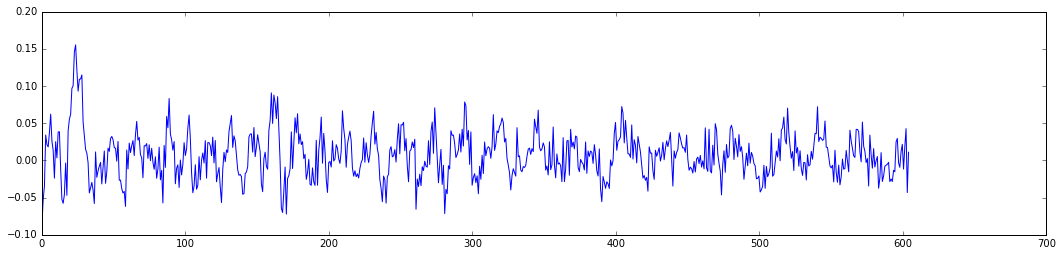

In [2]:
%matplotlib inline
import Lib_OpticalProbing as op
import matplotlib.pyplot as plt
import mahotas as mh
import numpy as np
from numpy.fft import fft, ifft, fftshift
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import signal
from Lib_OpticalProbing import *
resolution = 0.869 # um/px
xIn = np.loadtxt("lineout.txt", unpack=True)[192:888]
figIn = plt.figure(figsize=(18, 4))
plt.plot(np.arange(len(xIn)) * resolution,xIn)
plt.show()


# do some tests below

## wavelet tests

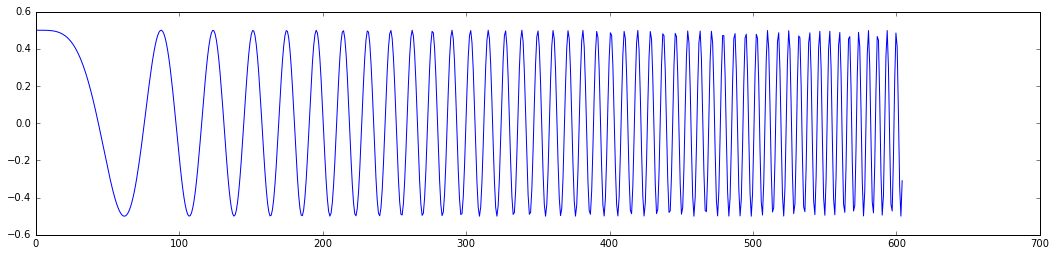

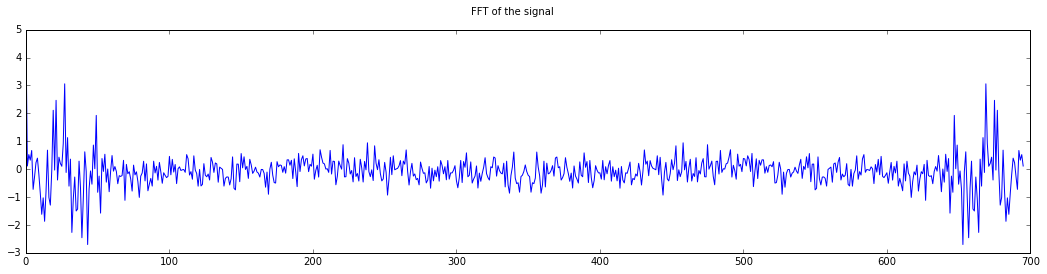

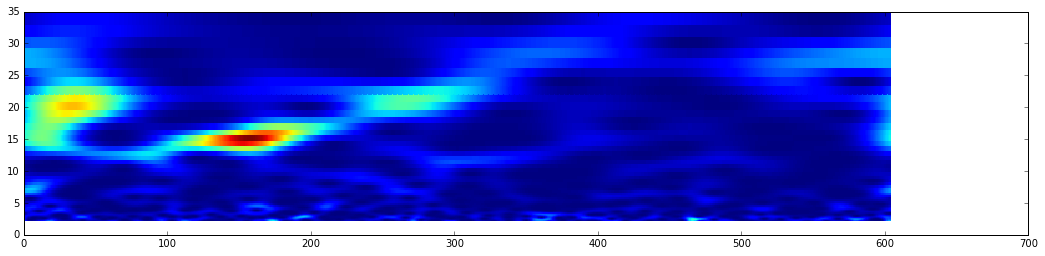

In [38]:
sig = np.copy(xIn)
N = sig.shape[0]
x = np.arange(N) * resolution
wavelength = 22
y = np.cos( 4*np.pi/wavelength/N * x**2)/2. #+ np.random.normal(0, 1./np.sqrt(20), N)#+ np.cos( np.pi/wavelength * x)/2.
fig = plt.figure(figsize=(18, 4))
plt.plot(x,y)

def zeropad(sig):
    n1 = len(sig)
    x = sig - np.mean(sig)
    base2 = np.fix(np.log(n1) / np.log(2) + 0.4999)  # power of 2 nearest to N
    x = np.concatenate((x, np.zeros(2 ** (base2 + 1) - n1)))
    return x
    
def Scalogram(sig, w0, M_octaves):
    sig = np.asarray(sig, dtype=float)
    #sig = zeropad(sig)
    
    N = sig.shape[0]
    SIG = fft(sig)
    fig = plt.figure(figsize=(18, 4))
    plt.plot(SIG.real)
    fig.suptitle("FFT of the signal")
    # equidistant sampling on the shift axis, materialized by a phaseshift of the FFT of the mother wavelet  
    phaseshift =  np.exp(-2j *  np.pi * np.arange(N) / N)
    
    # logorithmic sampling along the scale axis a 
    V_octaves = 12.
    a = NaturalSample(M_octaves) 
    M = a.shape[0]
    
    OUT = np.zeros((M,N), dtype = complex)
    for i in range(M):
        wlt = Morlet(N, w=w0, s=1.*a[i], complete=False) 
        
        OUT[i,:] = fftshift(ifft(SIG * fft(wlt) * phaseshift * a[i])) 
    return OUT 

w0 = 10*resolution
M_octaves = 4
OUT = Scalogram(sig, w0, M_octaves)
a = N*resolution/(op.NaturalSample(M_octaves)*w0)/2
X, A = np.meshgrid(x, a)
fig = plt.figure(figsize=(18, 4))
plt.pcolormesh(X,A,abs(OUT)**2)
plt.show()

In [3]:
def Morlet(M, w=5.0, s=1.0, complete=True):
    x = np.linspace(-s*2*np.pi, s*2*np.pi, M)
    output = np.exp(1j * w * x)
    if complete:
        output -= np.exp(-0.5 * (w**2))
        
    output *= np.exp(-0.5 * (x**2) * np.pi**(-0.25))    
    return output




1024


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


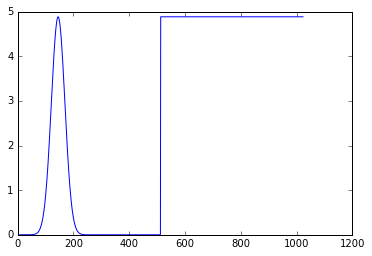

In [4]:
sig = np.copy(xIn)
n1 = len(sig)
x = sig - np.mean(sig)
base2 = np.fix(np.log(n1) / np.log(2) + 0.4999)  # power of 2 nearest to N
x = np.concatenate((x, np.zeros(2 ** (base2 + 1) - n1)))
n = len(x)

dt = np.copy(resolution)
s0 = 2 * dt
dj = 1./4
J1 = np.fix((np.log(n1 * dt / s0) / np.log(2)) / dj)
j = np.arange(0,J1+1)
scale = s0 * 2. ** (j * dj)

kplus = np.arange(1, np.fix(n / 2 + 1))
kplus = (kplus * 2 * np.pi / (n * dt))
kminus = (-(kplus[0:-1])[::-1])
k = np.concatenate(([0.], kplus, kminus))

n = len(k)
print n
kmask = np.array(k > 0., dtype=float)

param = 6.
k0 = np.copy(param)
expnt = -(scale[7] * k - k0) ** 2 / 2. * kmask
norm = np.sqrt(scale[7] * k[1]) * (np.pi ** (-0.25)) * np.sqrt(n)  # total energy=N   [Eqn(7)]
daughter = norm * np.exp(expnt)
plt.plot(daughter)


### FFT tests 

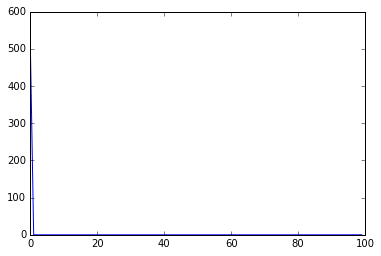

ValueError: operands could not be broadcast together with shapes (1024,) (696,) 

In [5]:
wavelength = 22
y = np.cos( 2*np.pi/wavelength * x)/2. #+ np.cos( np.pi/wavelength * x)/2.
Y = fft(y)
plt.plot(abs(Y[:100]))
plt.show()
phaseshift =  np.exp(-2j *  np.pi * np.arange(N) / N)
    
V_octaves = 12.
a = NaturalSample(M_octaves) 

i = 10
wlt = Morlet(N, w=w0, s=1.*a[i], complete=False) 
test1 = fftshift(ifft( (Y * fft(wlt)  * np.sqrt(a[i]) * phaseshift )))

test2 = np.convolve(y, wlt, "same")

plt.plot(abs(test1),"-r")
plt.plot(abs(test2))
